In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

In [20]:
# Muat dataset
file_path = 'Filedata Data Produksi Masker Gratis Selama Pandemi Covid-19 Di Provinsi DKI Jakarta.csv'
data = pd.read_csv(file_path)

In [21]:
# Menangani nilai yang hilang
data = data.dropna()

In [22]:
# Standarisasi nilai kategori
data['wilayah'] = data['wilayah'].str.title()
data['kecamatan_usaha'] = data['kecamatan_usaha'].str.title()

In [23]:
# Konversi tipe data jika diperlukan
data['kesanggupan_produksi_masker_perhari'] = data['kesanggupan_produksi_masker_perhari'].astype(int)

In [24]:
# Tampilkan data yang telah dibersihkan
data.head()

,periode_data,tahun,wilayah,kecamatan_usaha,patokan_drop_pick_up_material,jumlah_penjahit_tenaga_kerja,kesanggupan_produksi_masker_perhari
0,2020,2020,Jakarta Pusat,Cempaka Putih,Belakang kfc cempaka putih .taman bermain anakita,2,100
1,2020,2020,Jakarta Pusat,Cempaka Putih,Belakang mitra 10. Samping rutan salemba,2,50
2,2020,2020,Jakarta Pusat,Cempaka Putih,Jl. Rawasari Barat no E 3 Rt 011/01 samping se...,2,50
3,2020,2020,Jakarta Pusat,Cempaka Putih,Sebelah TK Islam Arraudhah dekat pasar rawasari,1,100
4,2020,2020,Jakarta Pusat,Cempaka Putih,Badan POM,5,150


In [25]:
# Statistik ringkasan
data.describe()

,periode_data,tahun,jumlah_penjahit_tenaga_kerja,kesanggupan_produksi_masker_perhari
count,329.0,329.0,329.000000,329.000000
mean,2020.0,2020.0,4.167173,1092.933131
std,0.0,0.0,12.442282,11274.607359
min,2020.0,2020.0,1.000000,0.000000
25%,2020.0,2020.0,1.000000,50.000000
50%,2020.0,2020.0,2.000000,100.000000
75%,2020.0,2020.0,3.000000,200.000000
max,2020.0,2020.0,150.000000,200000.000000


from matplotlib import pyplot as plt
_df_0['periode_data'].plot(kind='hist', bins=20, title='periode_data')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['tahun'].plot(kind='hist', bins=20, title='tahun')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['jumlah_penjahit_tenaga_kerja'].plot(kind='hist', bins=20, title='jumlah_penjahit_tenaga_kerja')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['kesanggupan_produksi_masker_perhari'].plot(kind='hist', bins=20, title='kesanggupan_produksi_masker_perhari')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='periode_data', y='tahun', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='tahun', y='jumlah_penjahit_tenaga_kerja', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='jumlah_penjahit_tenaga_kerja', y='kesanggupan_produksi_masker_perhari', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['periode_data'].plot(kind='line', figsize=(8, 4), title='periode_data')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['tahun'].plot(kind='line', figsize=(8, 4), title='tahun')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['jumlah_penjahit_tenaga_kerja'].plot(kind='line', figsize=(8, 4), title='jumlah_penjahit_tenaga_kerja')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['kesanggupan_produksi_masker_perhari'].plot(kind='line', figsize=(8, 4), title='kesanggupan_produksi_masker_perhari')
plt.gca().spines[['top', 'right']].set_visible(False)

In [37]:
# Menghapus outlier menggunakan metode IQR
Q1 = data['kesanggupan_produksi_masker_perhari'].quantile(0.25)
Q3 = data['kesanggupan_produksi_masker_perhari'].quantile(0.75)
IQR = Q3 - Q1
filter = (data['kesanggupan_produksi_masker_perhari'] >= (Q1 - 1.5 * IQR)) & (data['kesanggupan_produksi_masker_perhari'] <= (Q3 + 1.5 * IQR))
data_filtered = data.loc[filter]

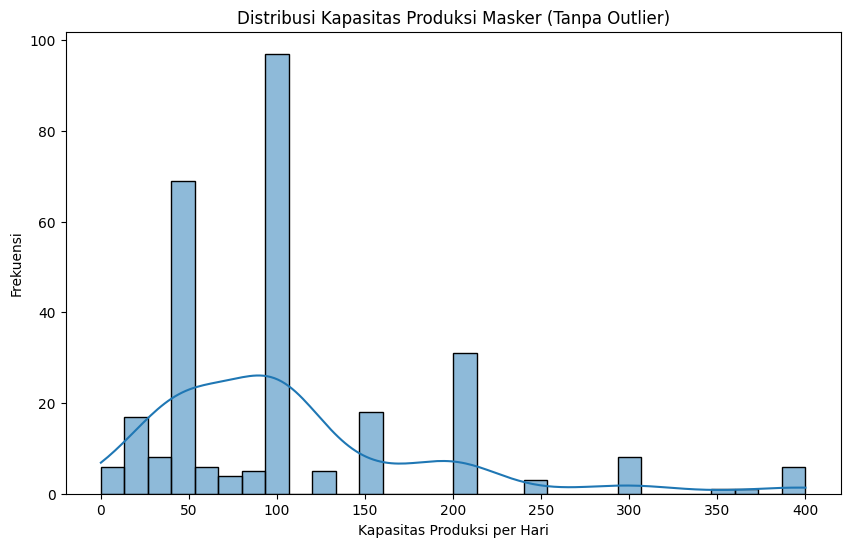

In [38]:
# Visualisasi ulang distribusi kapasitas produksi masker tanpa outlier
plt.figure(figsize=(10, 6))
sns.histplot(data_filtered['kesanggupan_produksi_masker_perhari'], bins=30, kde=True)
plt.title('Distribusi Kapasitas Produksi Masker (Tanpa Outlier)')
plt.xlabel('Kapasitas Produksi per Hari')
plt.ylabel('Frekuensi')
plt.show()

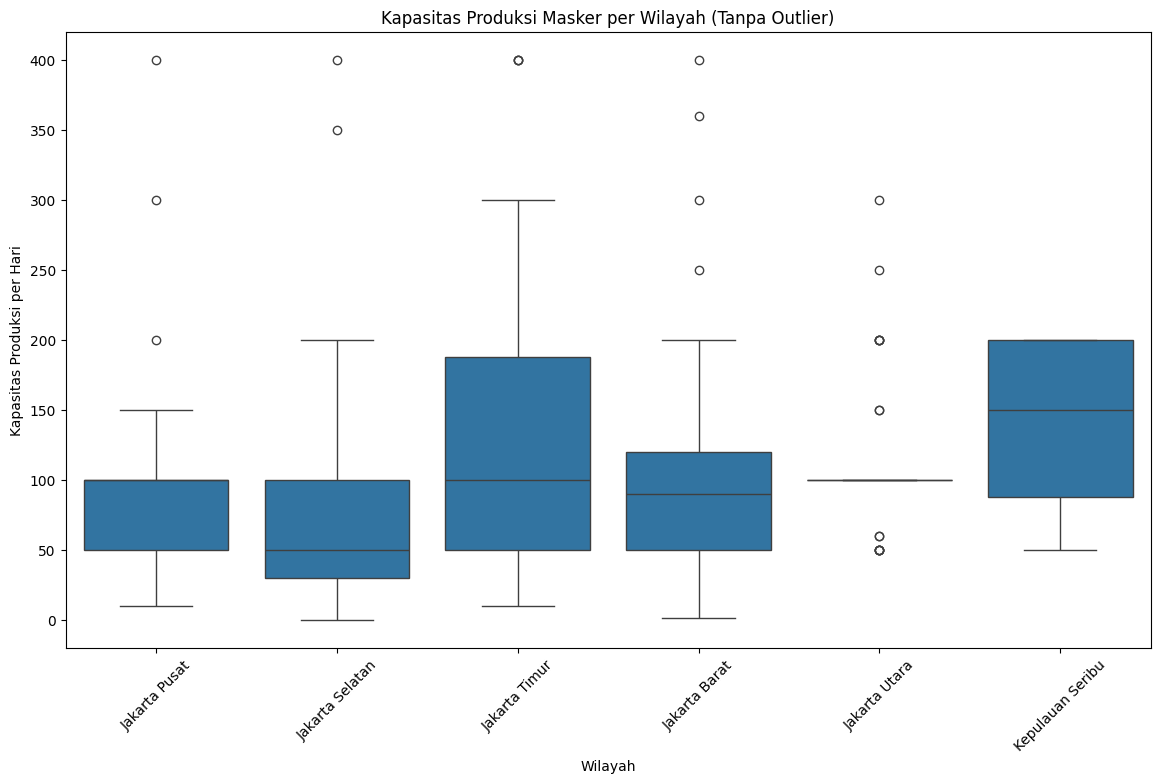

In [39]:
# Visualisasi kapasitas produksi masker per wilayah tanpa outlier
plt.figure(figsize=(14, 8))
sns.boxplot(x='wilayah', y='kesanggupan_produksi_masker_perhari', data=data_filtered)
plt.title('Kapasitas Produksi Masker per Wilayah (Tanpa Outlier)')
plt.xlabel('Wilayah')
plt.ylabel('Kapasitas Produksi per Hari')
plt.xticks(rotation=45)
plt.show()


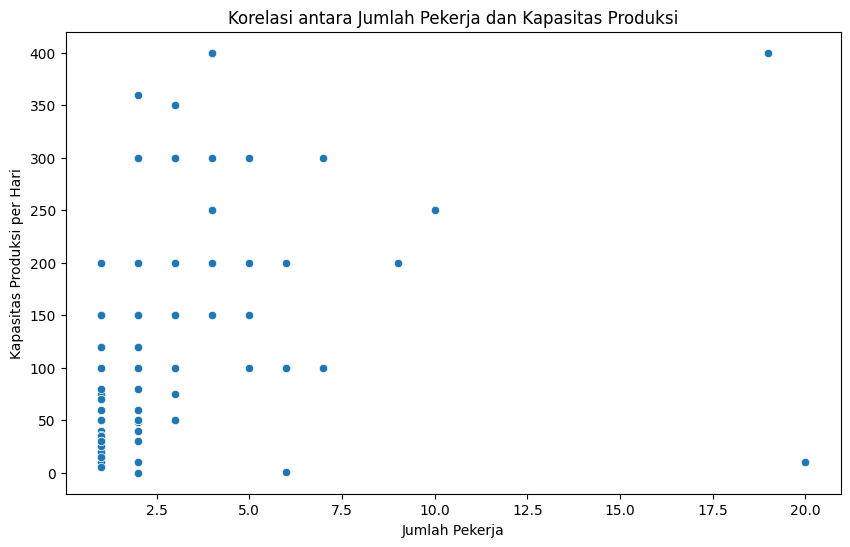

In [40]:
# Visualisasi korelasi antara jumlah pekerja dan kapasitas produksi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='jumlah_penjahit_tenaga_kerja', y='kesanggupan_produksi_masker_perhari', data=data_filtered)
plt.title('Korelasi antara Jumlah Pekerja dan Kapasitas Produksi')
plt.xlabel('Jumlah Pekerja')
plt.ylabel('Kapasitas Produksi per Hari')
plt.show()

In [41]:
# Menghitung korelasi
correlation = data_filtered[['jumlah_penjahit_tenaga_kerja', 'kesanggupan_produksi_masker_perhari']].corr()
print(correlation)

                                     jumlah_penjahit_tenaga_kerja  \
jumlah_penjahit_tenaga_kerja                             1.000000   
kesanggupan_produksi_masker_perhari                      0.404845   

                                     kesanggupan_produksi_masker_perhari  
jumlah_penjahit_tenaga_kerja                                    0.404845  
kesanggupan_produksi_masker_perhari                             1.000000  


In [42]:
# Menghitung efisiensi produksi (output per pekerja)
data_filtered['efficiency'] = data_filtered['kesanggupan_produksi_masker_perhari'] / data_filtered['jumlah_penjahit_tenaga_kerja']

<ipython-input-42-34e59a454792>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['efficiency'] = data_filtered['kesanggupan_produksi_masker_perhari'] / data_filtered['jumlah_penjahit_tenaga_kerja']


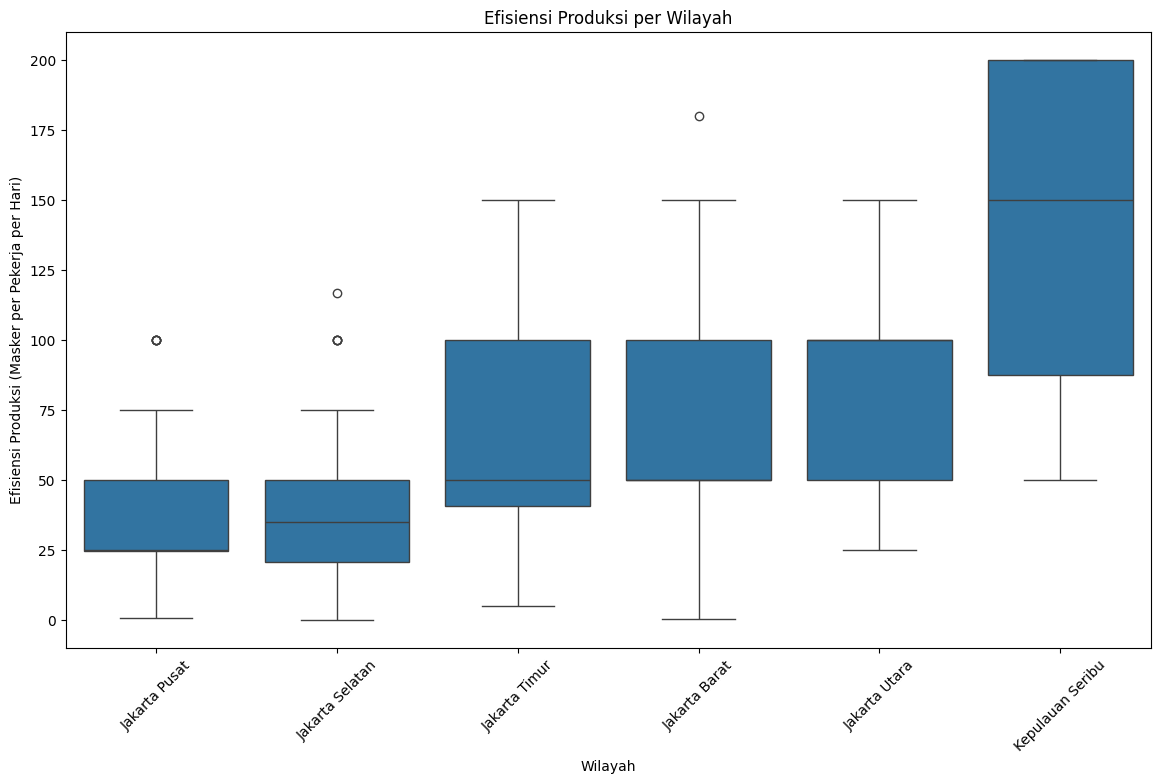

In [43]:
# Membandingkan efisiensi di berbagai wilayah
plt.figure(figsize=(14, 8))
sns.boxplot(x='wilayah', y='efficiency', data=data_filtered)
plt.title('Efisiensi Produksi per Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Efisiensi Produksi (Masker per Pekerja per Hari)')
plt.xticks(rotation=45)
plt.show()

**Temuan:**
1. Kapasitas produksi masker secara keseluruhan bervariasi secara signifikan di berbagai wilayah.
2. Terdapat korelasi positif antara jumlah pekerja dan kapasitas produksi, yang menunjukkan bahwa peningkatan jumlah pekerja dapat meningkatkan produksi.
3. Analisis geospasial menunjukkan kluster kapasitas produksi tinggi di beberapa wilayah.
4. Analisis efisiensi menunjukkan bahwa beberapa wilayah lebih efisien dalam produksi masker dibandingkan yang lain.

**Rekomendasi:**
1. Alokasikan lebih banyak pekerja ke wilayah dengan kapasitas produksi rendah untuk menyeimbangkan output.
2. Tingkatkan program pelatihan bagi pekerja di wilayah dengan efisiensi rendah untuk meningkatkan produktivitas.
3. Optimalkan distribusi bahan baku untuk memastikan semua wilayah memiliki sumber daya yang cukup untuk produksi masker.
